## classfication Maternal Health Risk level.  

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head(7)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk


In [38]:
print(df.info)

<bound method DataFrame.info of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>


In [39]:
df.shape

(1014, 7)

In [40]:
print(df.describe)

<bound method NDFrame.describe of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>


In [41]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

low risk  406  mid risk  336  high risk  272
Axes(0.125,0.11;0.775x0.77)


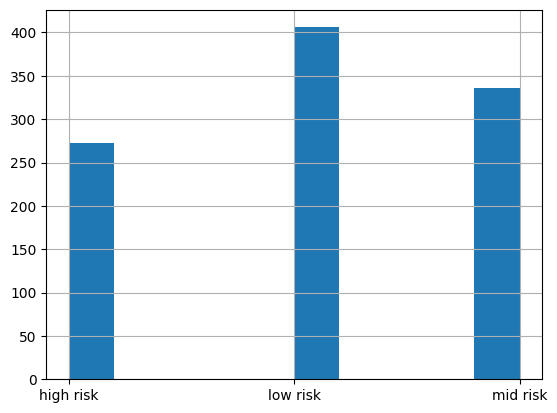

In [42]:
low_risk = df[df['RiskLevel'] == 'low risk']
mid_risk = df[df['RiskLevel'] == 'mid risk']
high_risk = df[df['RiskLevel'] == 'high risk']

print ('low risk ' ,low_risk.shape[0] , ' mid risk ', mid_risk.shape[0] , ' high risk ' , high_risk.shape[0] )
print(df['RiskLevel'].hist())

<Axes: xlabel='DiastolicBP'>

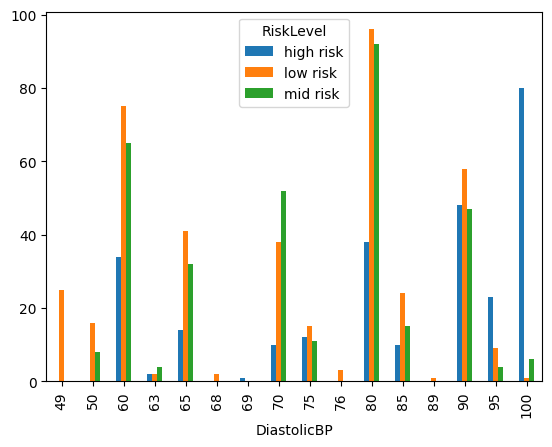

In [43]:
# measures the pressure in your arteries when your heart rests between beats and the impact on risk level
age = pd.crosstab(df['DiastolicBP'] , df['RiskLevel'])
age.plot(kind='bar')

<Axes: xlabel='SystolicBP'>

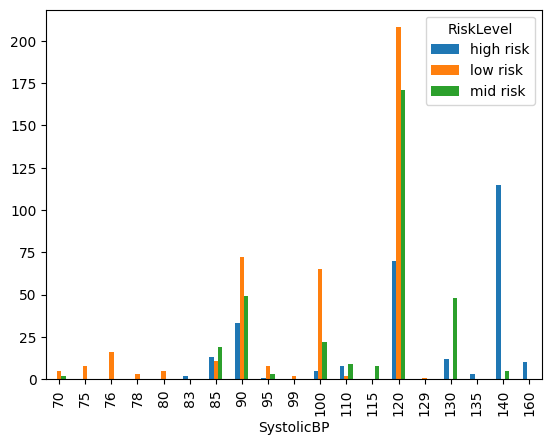

In [44]:
# measures the pressure in your arteries when your heart beats and the impact on risk level
age = pd.crosstab(df['SystolicBP'] , df['RiskLevel'])
age.plot(kind='bar')

<Axes: >

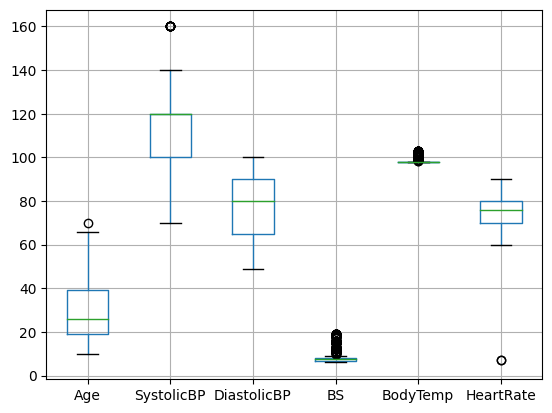

In [45]:
df.boxplot()

In [46]:
feature =['Age',	'SystolicBP',	'DiastolicBP',	'BS',	'BodyTemp','HeartRate']

x = df[feature]
y = df['RiskLevel']

x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


rf.fit(x_train, y_train)


RandomForestClassifier()

In [48]:
from sklearn.metrics import accuracy_score,  classification_report , f1_score, recall_score , precision_score

tffpre = rf.predict(x_test)

report = classification_report (y_test, tffpre)


print('report ',report )

report                precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.89      0.74      0.81        80
    mid risk       0.74      0.88      0.80        76

    accuracy                           0.82       203
   macro avg       0.83      0.82      0.82       203
weighted avg       0.83      0.82      0.82       203



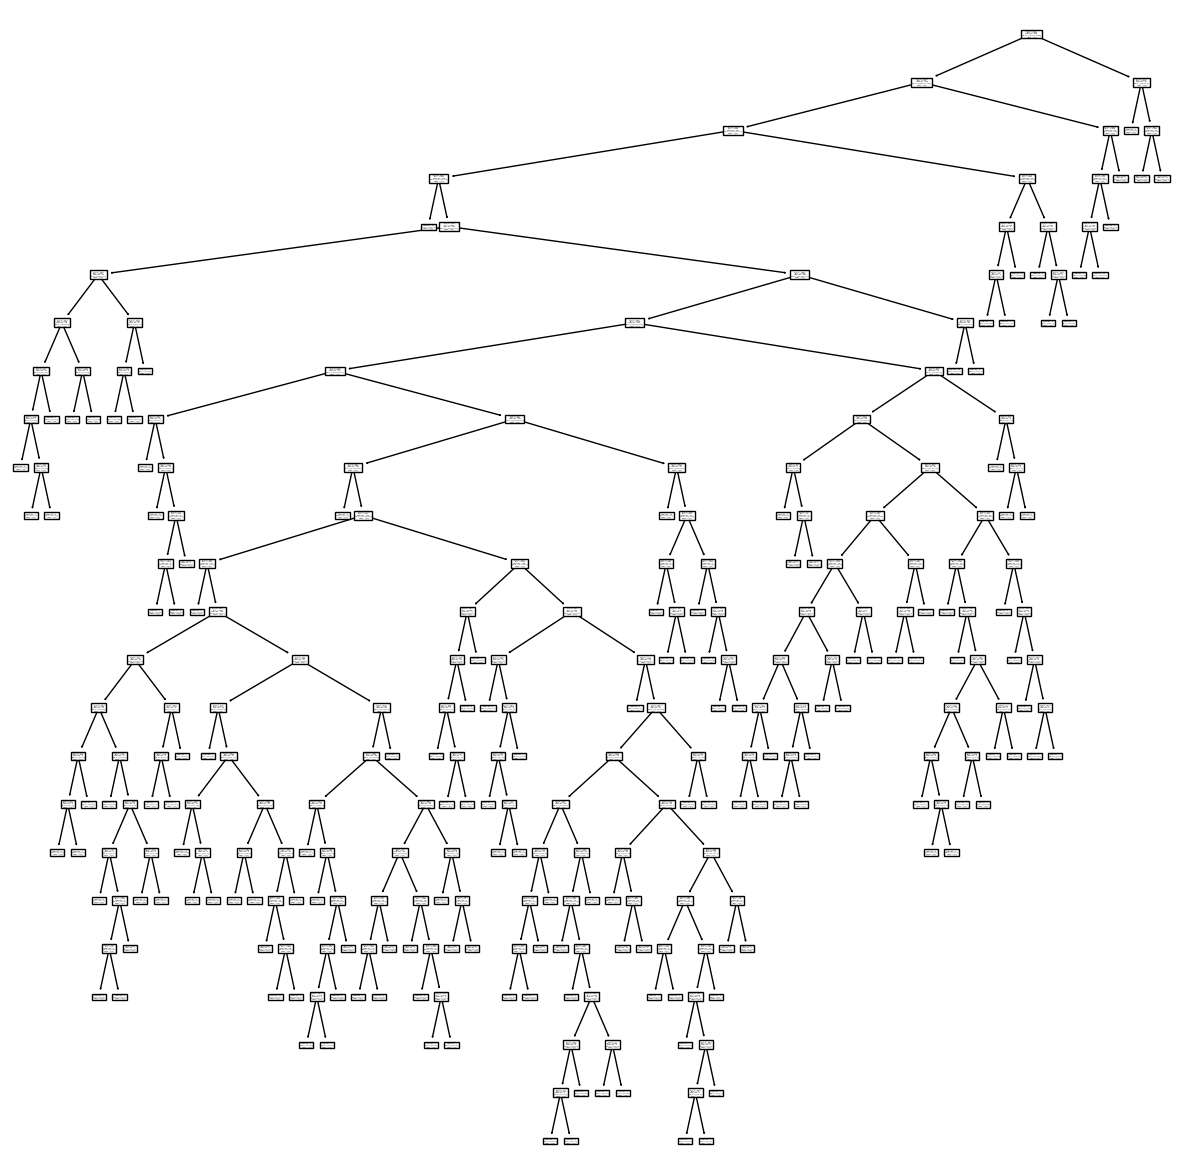

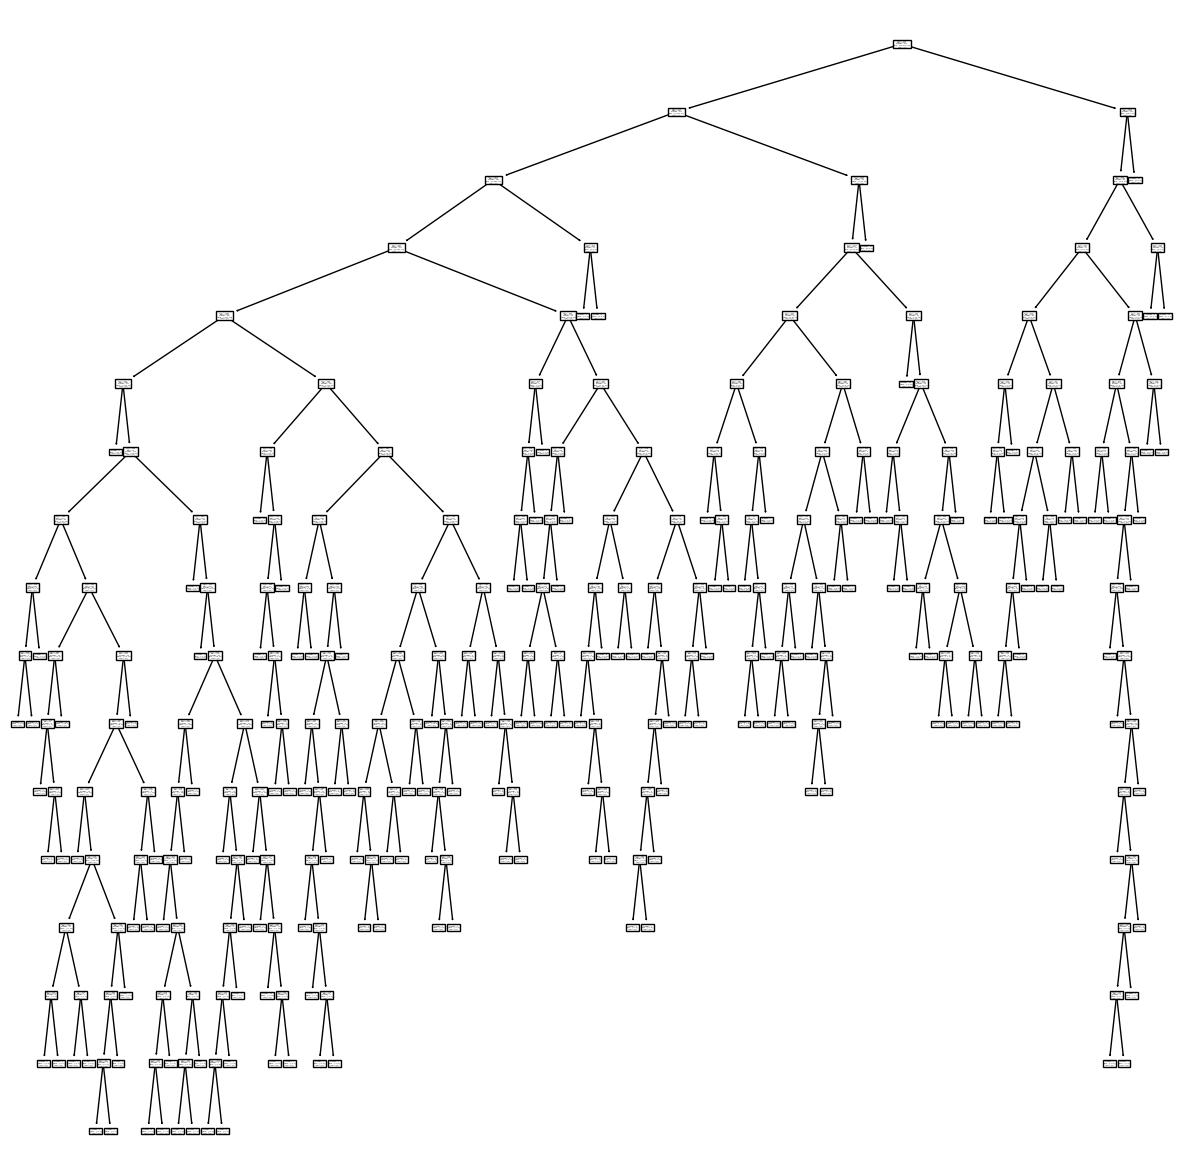

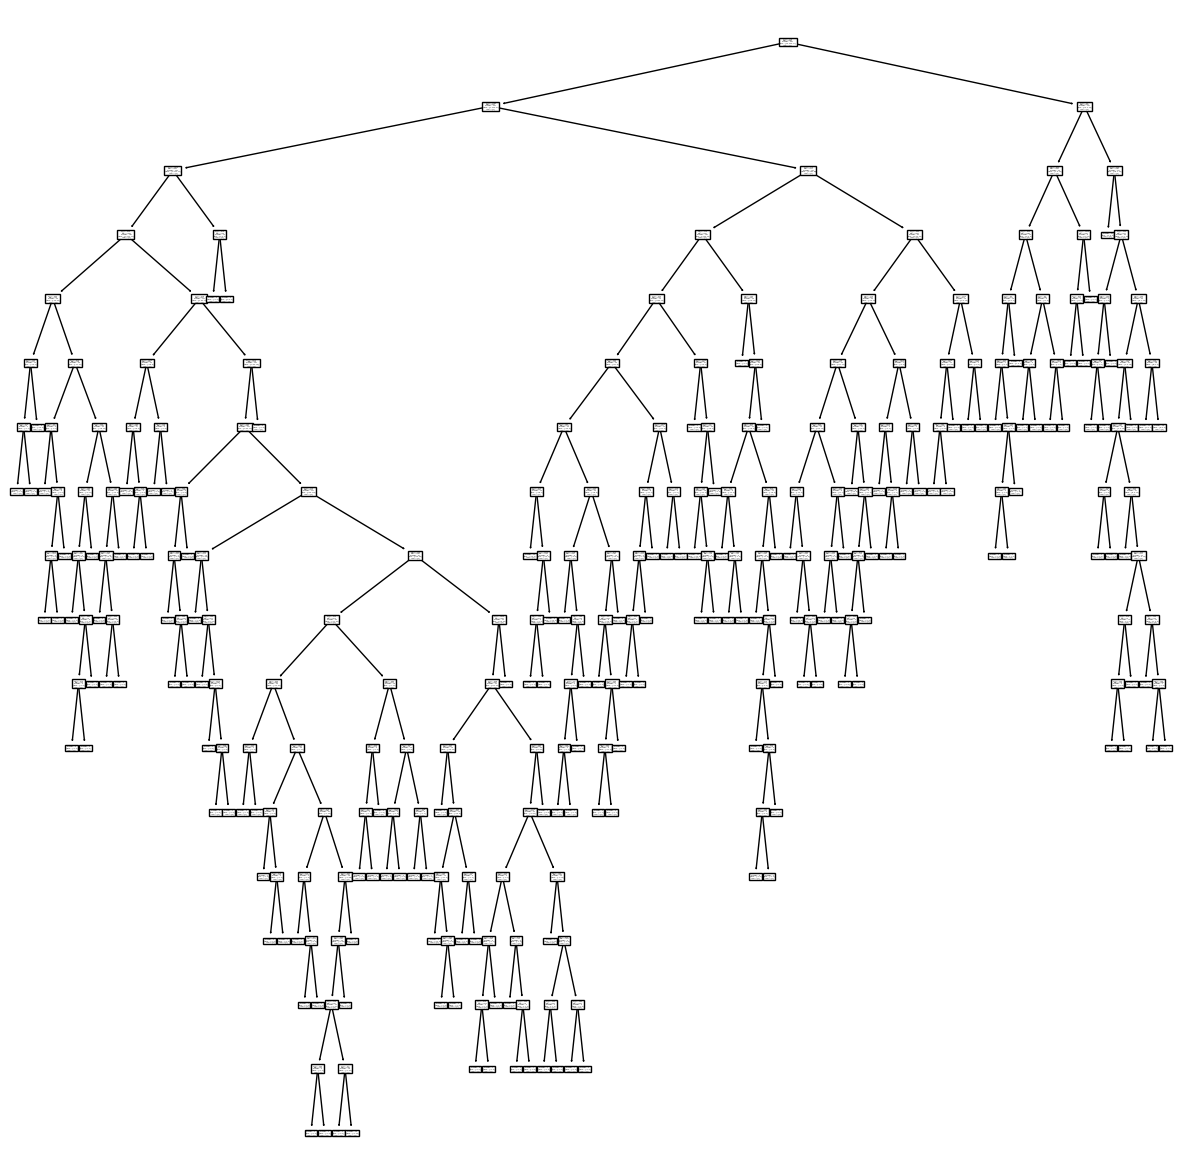

In [49]:
from sklearn.tree import plot_tree

for i in range(3):  # Visualize first three trees
    plt.figure(figsize=(15, 15))
    plot_tree(rf[i], class_names=True)
    plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [51]:
tpre = tree.predict(x_test)


accuracy = accuracy_score(tpre , y_test)
f1 = f1_score(tpre, y_test, average='micro')
recall = recall_score(tpre, y_test , average='micro')
precision = precision_score (tpre, y_test, average='micro')


print('accuracy ',accuracy )
print('f1 ',f1 )
print('recall ',recall )
print('precision ',precision )

accuracy  0.8177339901477833
f1  0.8177339901477833
recall  0.8177339901477833
precision  0.8177339901477833


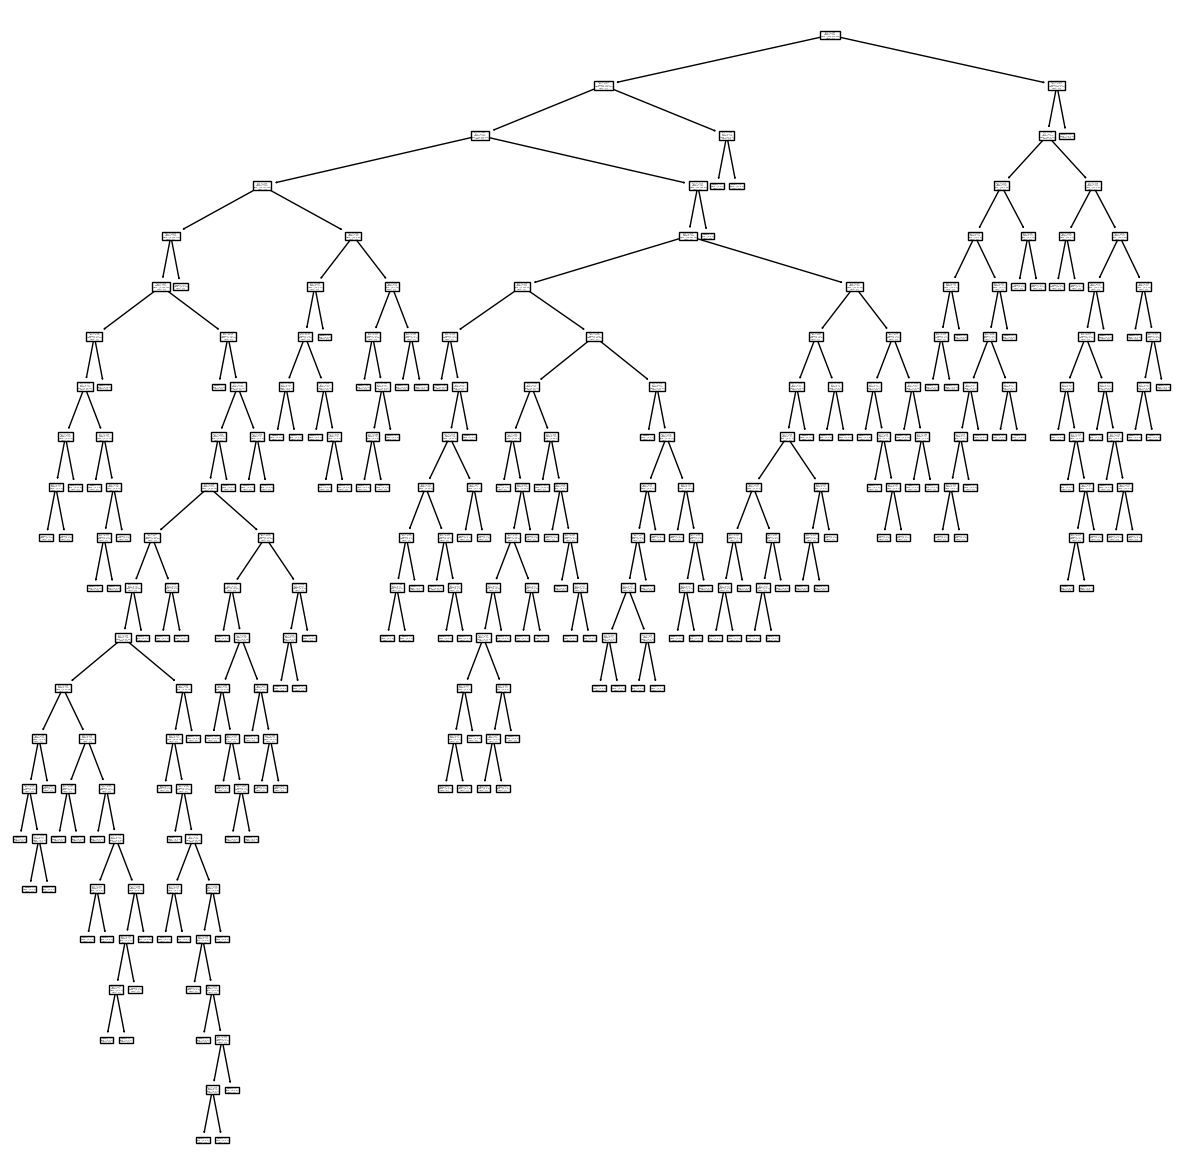

In [52]:
plt.figure(figsize=(15,15))
plot_tree(tree, class_names=True)
plt.show()